In [1]:
import copy

from utilities import energy_fun, update_energy, Flipper, metropolis_rule, ising_ferro
import numpy as np

import matplotlib.pyplot as plt

In [17]:
n_iters = 5*10 ** 5
q = 5
side = 20
N = side ** 2
energies = {}
magnetizations = {}
acceptance = {}
burnin = 5000

In [18]:
# ayo = []

In [19]:
def metropolis(T):
    flipper = Flipper(N, q, n_iters + burnin)
    energies[T] = []
    magnetizations[T] = []
    ens = energies[T]
    mags = magnetizations[T]
    acceptance[T] = 0
    # J = -np.ones((N, N))
    J = ising_ferro(N, side)
    sigma = np.random.randint(0, q, N)
    energy = energy_fun(J, sigma)
    # run for some iterations to reach stationary distribution
    for _ in range(burnin):
        index, val = flipper.propose(J, sigma)
        delta_e = update_energy(J, sigma, index, val)
        if metropolis_rule(delta_e, T):
            sigma[index] = val
            energy += delta_e

    mags.append([int(sum(sigma == x)) for x in range(q)])
    ens.append(energy)

    for it in range(n_iters):
        index, val = flipper.propose(J, sigma)
        delta_e = update_energy(J, sigma, index, val)

        nm = copy.copy(mags[-1])

        # ayo.append(np.exp(- delta_e / T))

        if metropolis_rule(delta_e, T):
            acceptance[T] += 1
            nm[sigma[index]] -= 1
            nm[val] += 1

            sigma[index] = val
            energy += delta_e

        mags.append(nm)
        ens.append(energy)
    acceptance[T] /= n_iters

In [20]:
temps = np.arange(.6, .9, .05)
# tmatt = 5e-4
# temps = [tmatt]
for t in temps:
    print(f"Computing {t=}")
    metropolis(t)

Computing t=0.6
Computing t=0.65
Computing t=0.7000000000000001
Computing t=0.7500000000000001
Computing t=0.8000000000000002
Computing t=0.8500000000000002
Computing t=0.9000000000000002


In [21]:
# for x in energies.values():
#     print(sum(x) / len(x))

print(len(temps))

avg_mags = dict()
for temp, m in magnetizations.items():
    avg_mags[temp] = [sum([x[i] / N for x in m]) / n_iters for i in range(q)]

7


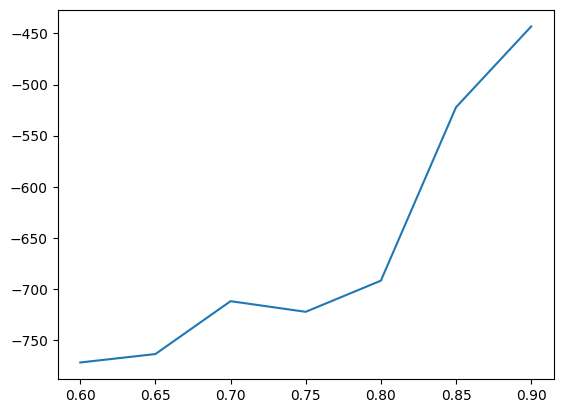

In [22]:
plt.plot(temps, [sum(x) / len(x) for x in energies.values()])

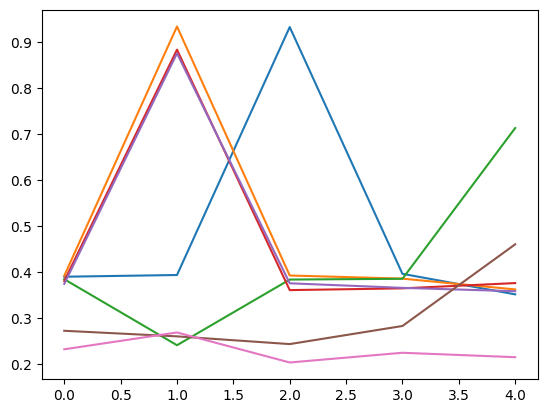

In [23]:
plt.plot([[abs(x[i] - 1/q) + 1/q for x in avg_mags.values()] for i in range(q)])

In [12]:
plt.plot(temps, [(x - .5) + .5 for x in avg_mags.values()])

TypeError: unsupported operand type(s) for -: 'list' and 'float'

In [13]:
avg_en_temp = [sum(x) / len(x) for x in energies.values()]

In [14]:
avg_en_temp = np.array(avg_en_temp)
print(avg_en_temp)

[-694.2098579  -684.04804952 -647.09267907 -602.72872271 -666.59594404
 -475.4497355  -447.62582374]


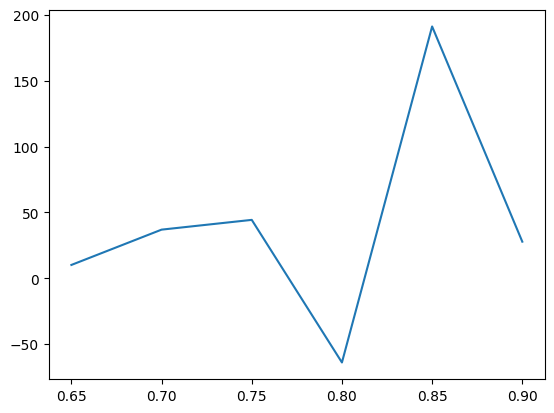

In [15]:
diff = np.convolve(avg_en_temp, [1,-1])[1:-1]
plt.plot(temps[1:], diff)


In [16]:
acceptance

{0.6: 0.05531,
 0.65: 0.0655,
 0.7000000000000001: 0.10087,
 0.7500000000000001: 0.14222,
 0.8000000000000002: 0.10438,
 0.8500000000000002: 0.27492,
 0.9000000000000002: 0.31395}